<a href="https://colab.research.google.com/github/AnIsAsPe/Prediccion-produccion-electricidad/blob/main/notebooks/regresi%C3%B3n%2C_ruido_y_series_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas y funciones

In [1]:
import numpy as np
import pandas as pd

from statsmodels.tsa.arima_process import ArmaProcess          # para simular proceso ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt

In [2]:
def genera_puntos_regresion(m, b, sigma, n=10):
    '''genera coordenadas en x y y de puntos aleatorios
    en regresión.
    m: pendiente
    b: ordenada al origen
    sigma: desviación estándar de errores gaussianos
    n: cantidad de puntos a generar'''

    # generamos las x's
    xdata = np.linspace(start=-1.0, stop=1.0, num= n)

    # generamos errores normales
    errors = np.random.normal(loc=0, scale=sigma, size = n)

    # generamos las y's
    ydata = m * xdata + b + errors

    return xdata, ydata

In [3]:
def autocorrelacion(serie, lag=1):
  '''La serie de tiempo deberá ser un objeto Series de pandas'''
  df = pd.DataFrame({'serie': serie, 'serie_desplazada': serie.shift(lag)})
  autocorr = df['serie'].corr(df['serie_desplazada'])
  # print('Correlación: ', correlacion, '/n')
  return df, autocorr

# Simulación de puntos en 2d a partir de la ecuación de una recta

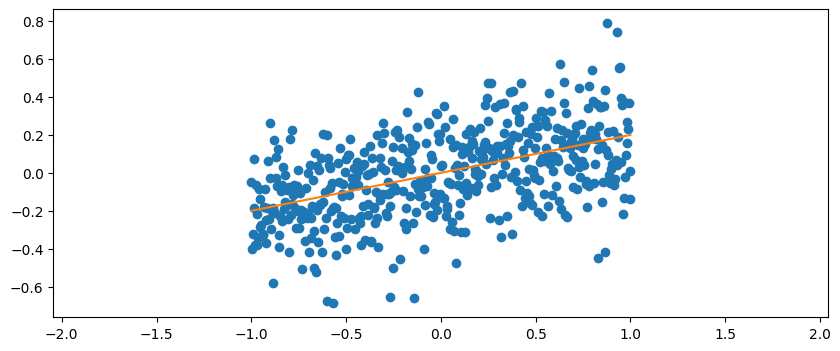

In [83]:
m = .2
b = 0
sigma = .2

xs, ys = genera_puntos_regresion(m, b, sigma, n=500)

fig = plt.figure(figsize = (10, 4))
plt.plot(xs, ys, 'o')
plt.plot(xs, m * xs + b)

plt.axis('equal')
plt.show()

<Axes: ylabel='Frequency'>

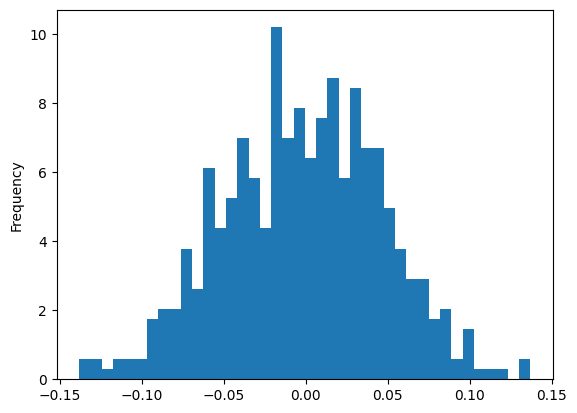

In [11]:
errores = ys -  m * xs - b
pd.Series(errores).plot.hist(bins=40, density = True)

# Simulación de Ruido blanco
* media constante
* varianza constante
* no tiene autocorrelaciones significativas

### iid

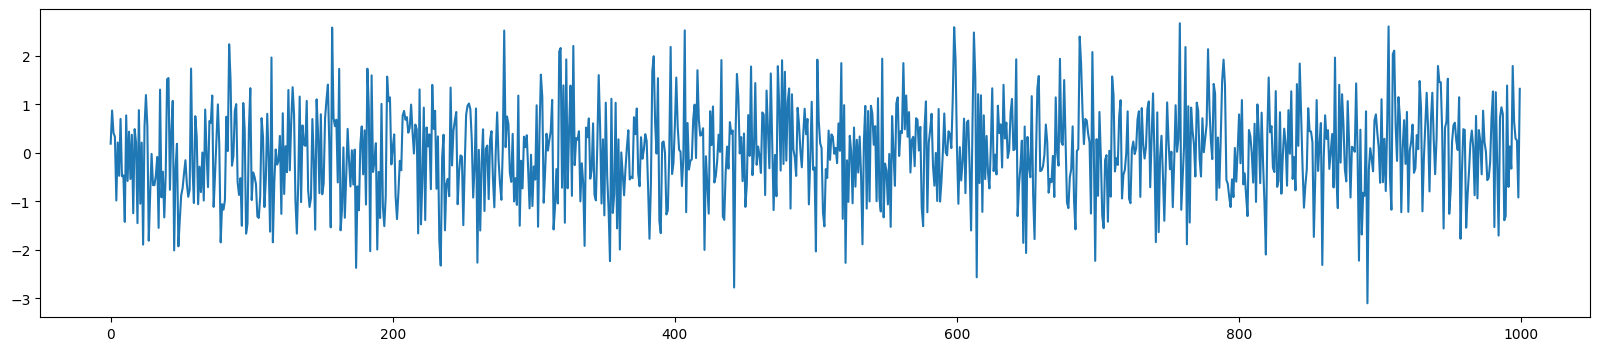

In [41]:
media = 0
std = 1
num_muestras = 1000
ruido_blanco = pd.Series(np.random.normal(media, std, num_muestras))

ruido_blanco.plot(figsize = (20,4))
plt.show()

<Axes: ylabel='Frequency'>

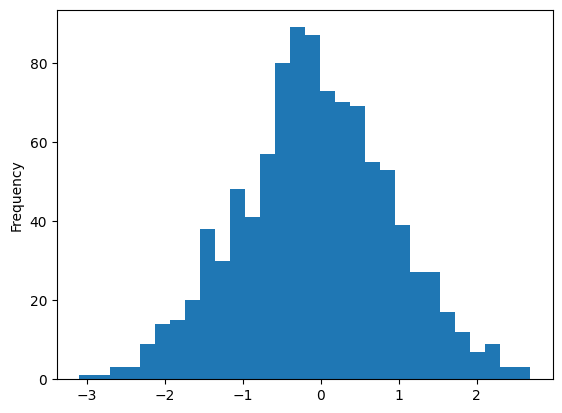

In [22]:
ruido_blanco.plot.hist(bins=30)

La función de autocorrelación revela la correlación entre dos valores cualquiera, separados por k unidades en el tiempo.

Captura los efectos directos e indirectos del valor anterior sobre el valor presente.
Mide la correlación de un serie con una versión desplazada en el tiempo de sí misma.
[Ver más](https://en.wikipedia.org/wiki/Autocorrelation)


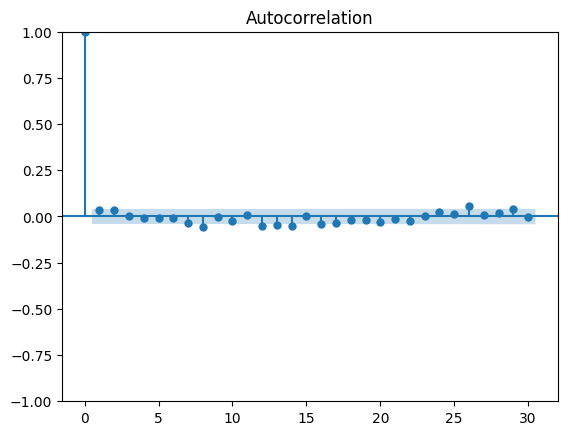

In [23]:
# Función de autocorrelación
plot_acf(ruido_blanco,   alpha=0.2, lags=30)
plt.show()

In [27]:
df, autocorr = autocorrelacion(ruido_blanco, lag=2)

In [28]:
autocorr

np.float64(0.034648096073636905)

In [29]:
df

,serie,serie_desplazada
0,0.098294,NaN
1,-0.597278,NaN
2,0.990284,0.098294
3,0.075575,-0.597278
4,-1.885769,0.990284
...,...,...
995,-1.312226,-2.204373
996,-0.001974,1.377199
997,-0.195828,-1.312226
998,0.723485,-0.001974


La función de autocorrelacion parcial mide la correlación **condicionada**, entre observaciones de tiempo que se encuentran separadas por k unidades en el tiempo, a fin de **controlar las correlaciones con los retrasos intermedios**.




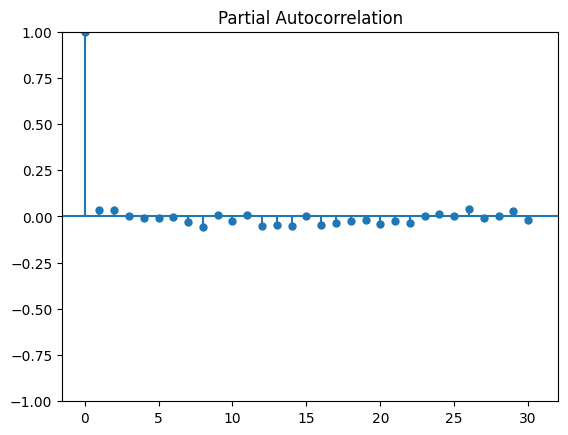

In [30]:
# Función de autocorrelación parcial

plot_pacf(ruido_blanco, alpha=1, lags=30)
plt.show()

### otros ruidos blancos

####__Ejemplo 1 (Exercise 0.2.3 de la notas)__

1) Sea $X_t$ un proceso iid y $Y$ una variable aleatoria con distribución Bernoulli con $p = 0.5$

Entonces la variable aleatoria

$Z_t= X_t~Y- X_t(Y-1)^2$ es un ruido blanco

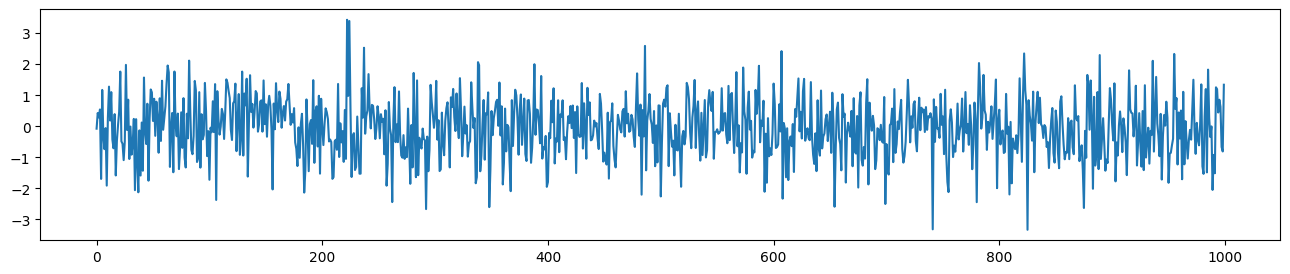

In [ ]:
num_muestras = 1000
X_t = pd.Series(np.random.normal(size= num_muestras))
Y = pd.Series(np.random.binomial(1, p = 0.5, size = num_muestras))
Z_t = (X_t * Y) - X_t*pow((Y - 1),2)

Z_t.plot(figsize = (16,3))
plt.show()

<Axes: ylabel='Frequency'>

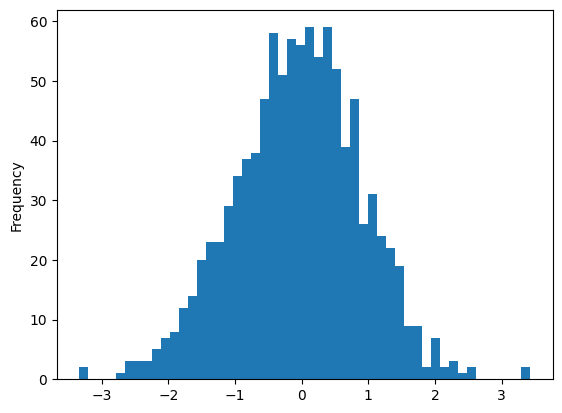

In [ ]:
Z_t.plot.hist(bins=50)

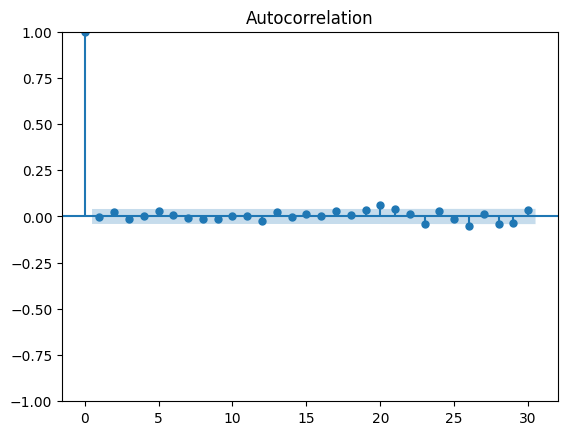

In [ ]:
# Función de autocorrelación
plot_acf(Z_t,   alpha=0.2, lags=30)
plt.show()

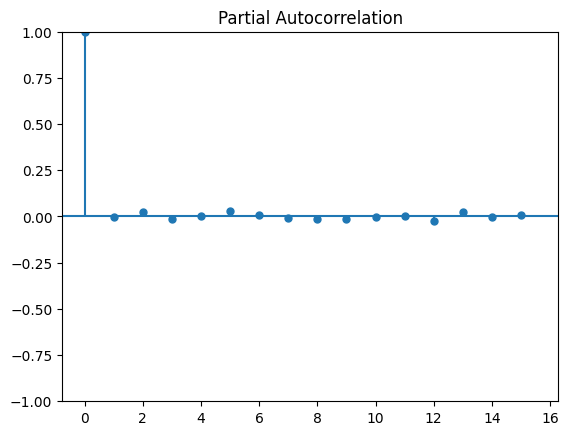

In [ ]:
# Función de autocorrelación parcial

plot_pacf(Z_t, alpha=1, lags=15)
plt.show()

####__Ejemplo 2 (Excercise 0.2.3 de la notas)__

2) Sea $X_t$ un proceso iid y el proceso estocástico definido por:

- $Z_t = X_t$ cuando t es par, y
- $Z_t = \frac{1}{\sqrt{2}}(X^2_{t-1}-1)$ cuando t es impar,

es un ruido blanco

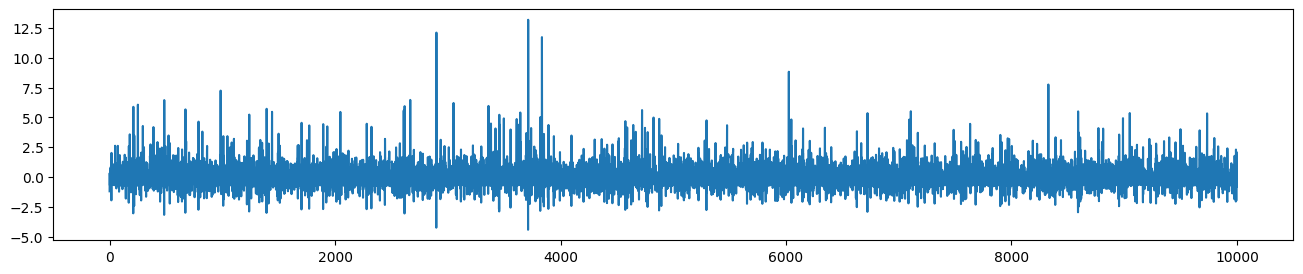

In [ ]:
num_muestras  = 10000
Xt = pd.Series(np.random.normal(size= num_muestras))
Zt = pd.Series(np.zeros(num_muestras))
for i in range(len(Zt)):
  if i % 2 == 0:
    Zt[i]= Xt[i]
  else:
    Zt[i] = 1/np.sqrt(2)*(pow(Xt[i-1], 2)-1)

Zt.plot(figsize = (16,3))
plt.show()

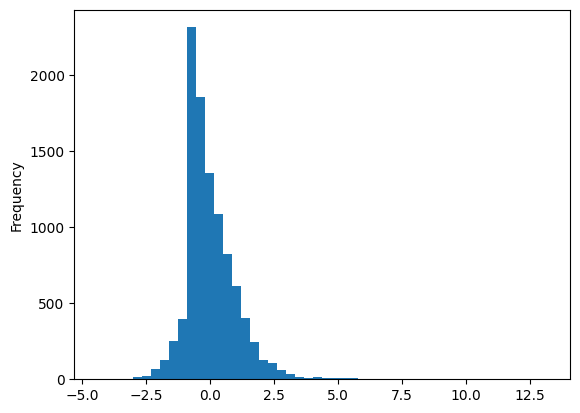

In [ ]:
Zt.plot.hist(bins=50)
plt.show()

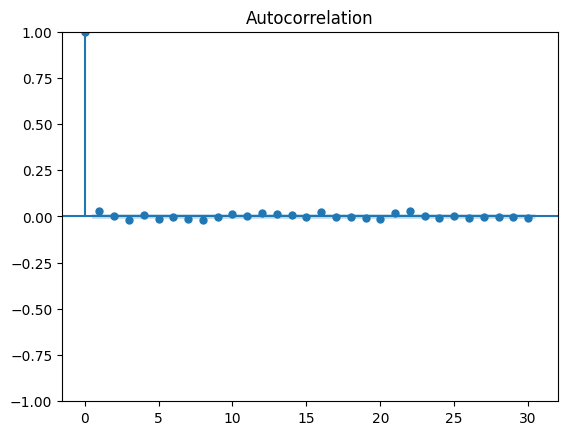

In [ ]:
# Función de autocorrelación
plot_acf(Zt,   alpha=0.2, lags=30)
plt.show()

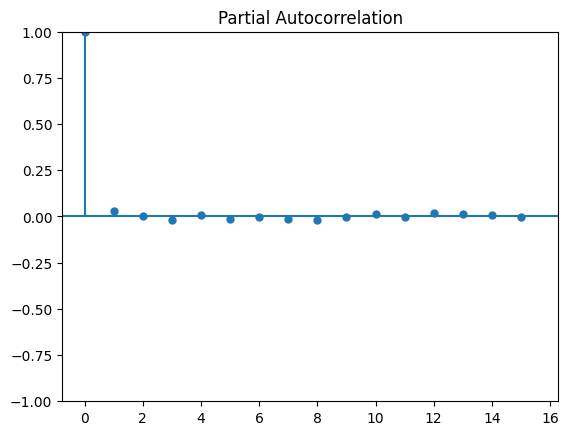

In [ ]:
# Función de autocorrelación parcial

plot_pacf(Zt, alpha=1, lags=15)
plt.show()

# Simulación de un proceso autorregresivo  (AR)

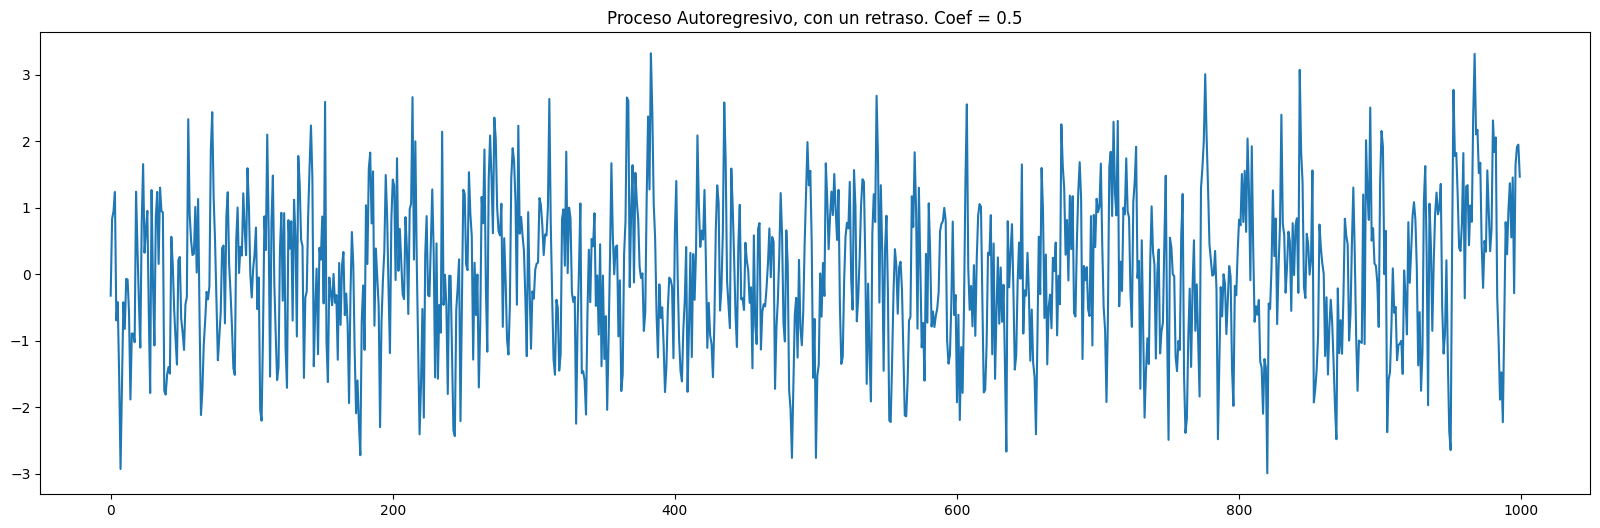

In [84]:
coef = 0.5
ar = np.array([1, - coef])
ma = np.array([1])

titulo = 'Proceso Autoregresivo, con un retraso. Coef = ' + str(coef)
AR_model = ArmaProcess(ar, ma)
#plt.rc("figure", figsize=(20,4))


AR_simulacion = pd.Series(AR_model.generate_sample(nsample=1000))
AR_simulacion.plot(figsize = (20,6), title=titulo)
plt.show()

<Axes: ylabel='Frequency'>

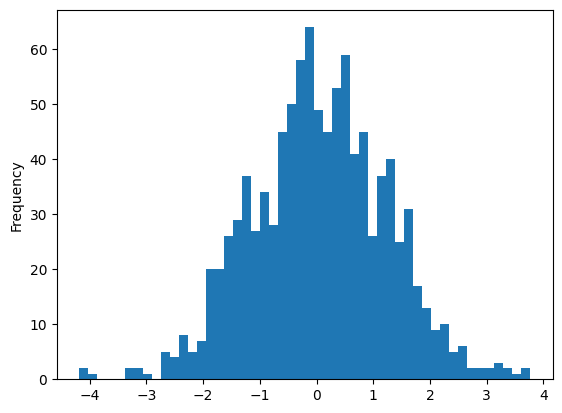

In [59]:
AR_simulacion.plot.hist(bins=50)

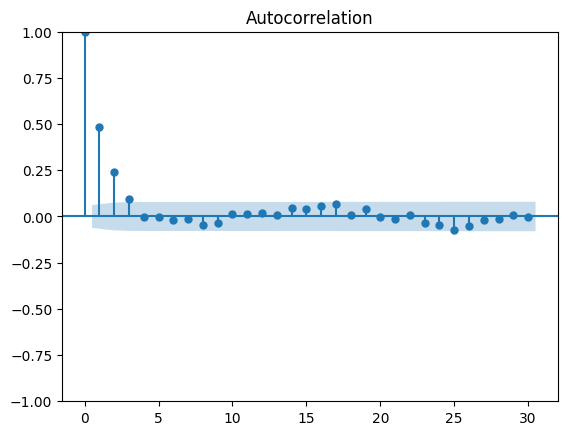

In [89]:
# Función de autocorrelación
plot_acf(AR_simulacion, lags=30)
plt.show()

In [61]:
df, autocorr = autocorrelacion(AR_simulacion, lag=1)
print(autocorr)
df

0.5521515342614383


,serie,serie_desplazada
0,-0.498041,NaN
1,-0.258284,-0.498041
2,0.016577,-0.258284
3,-0.986528,0.016577
4,-0.233489,-0.986528
...,...,...
995,1.625024,1.476562
996,-1.372564,1.625024
997,-1.535691,-1.372564
998,0.781637,-1.535691


En los proceso autorregresivos la función de autocorrelación parcial **(pacf)** se utiliza para investigar cuántos retrasos es necesario considerar en el modelo **Auto Regresivo**

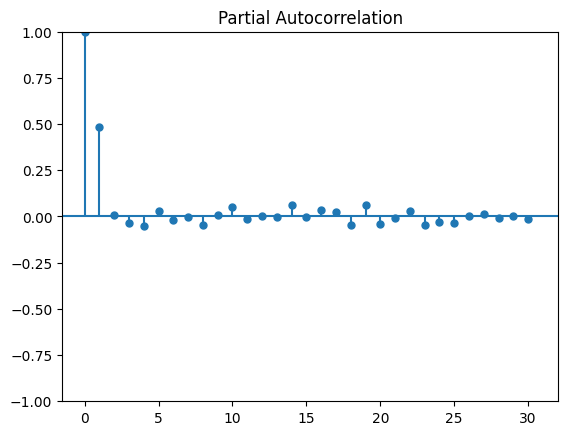

In [88]:
# Función de autocorrelación parcial

plot_pacf(AR_simulacion, alpha=1, lags=30)
plt.show()

# Simulación de serie de tiempo Medias Móviles (MA)

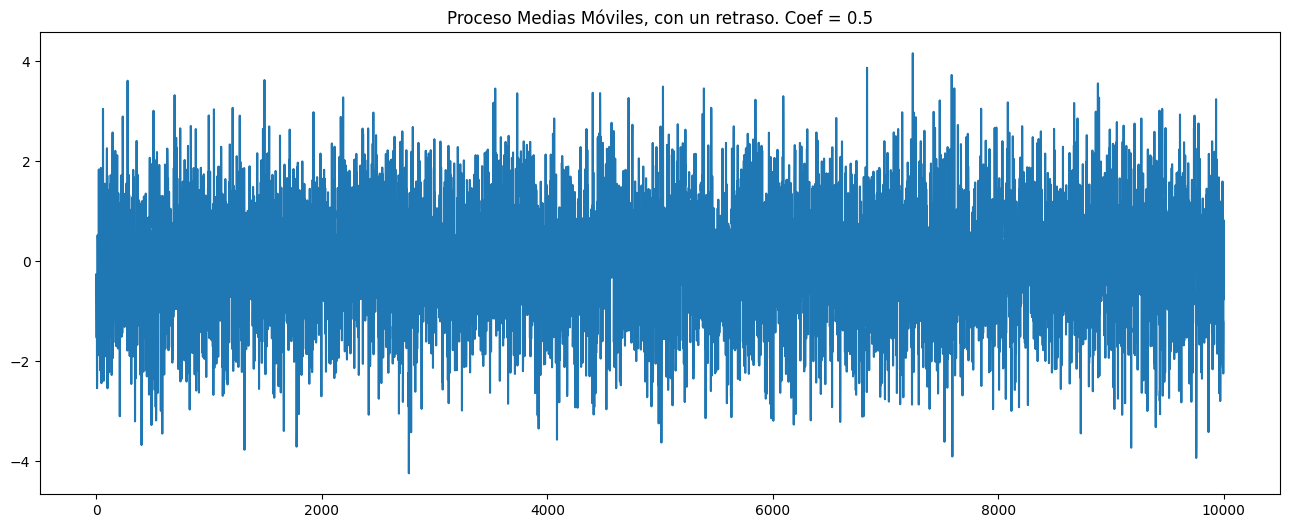

In [68]:
coef = .5
ar = np.array([1])
ma = np.array([1, coef])

titulo = 'Proceso Medias Móviles, con un retraso. Coef = ' + str(coef)
MA_model = ArmaProcess(ar, ma)
MA_simulacion = pd.Series(MA_model.generate_sample(nsample=10000))
MA_simulacion.plot(figsize = (16,6), title=titulo)
plt.show()

<Axes: ylabel='Frequency'>

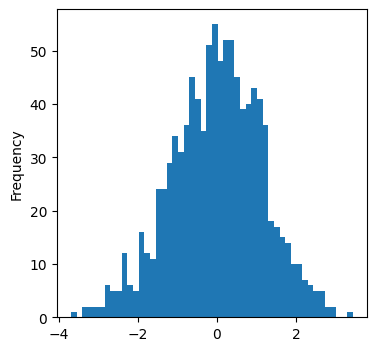

In [64]:
MA_simulacion.plot.hist(figsize=(4,4), bins=50)

Para los modelos de **medias móviles** se utiliza la función de autocorrelación (**acf**) para investigar el orden del modelo.

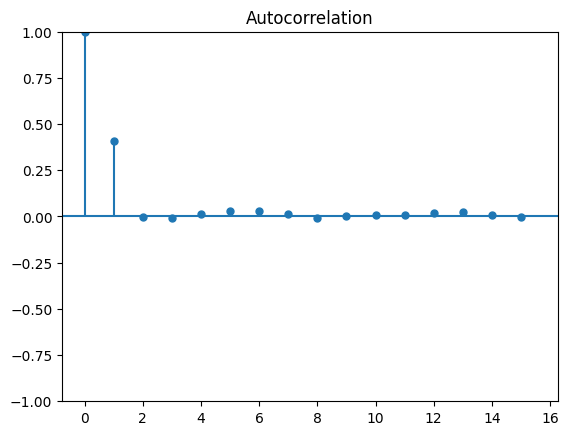

In [69]:
# Función de autocorrelación
plot_acf(MA_simulacion, alpha=1, lags=15)
plt.show()

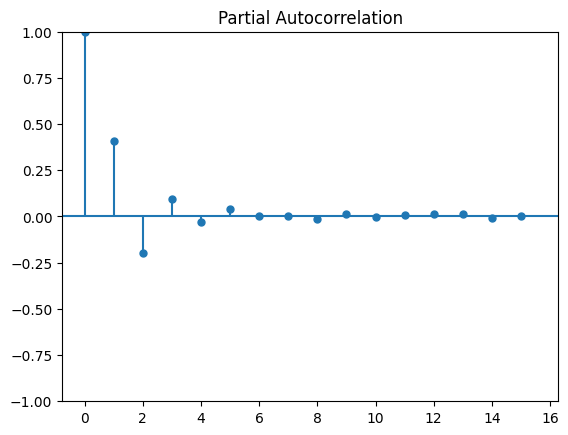

In [70]:
# Función de autocorrelación
plot_pacf(MA_simulacion, alpha=1, lags=15)
plt.show()

# Simulación de un proceso autorregresivo  (AR) Orden 2

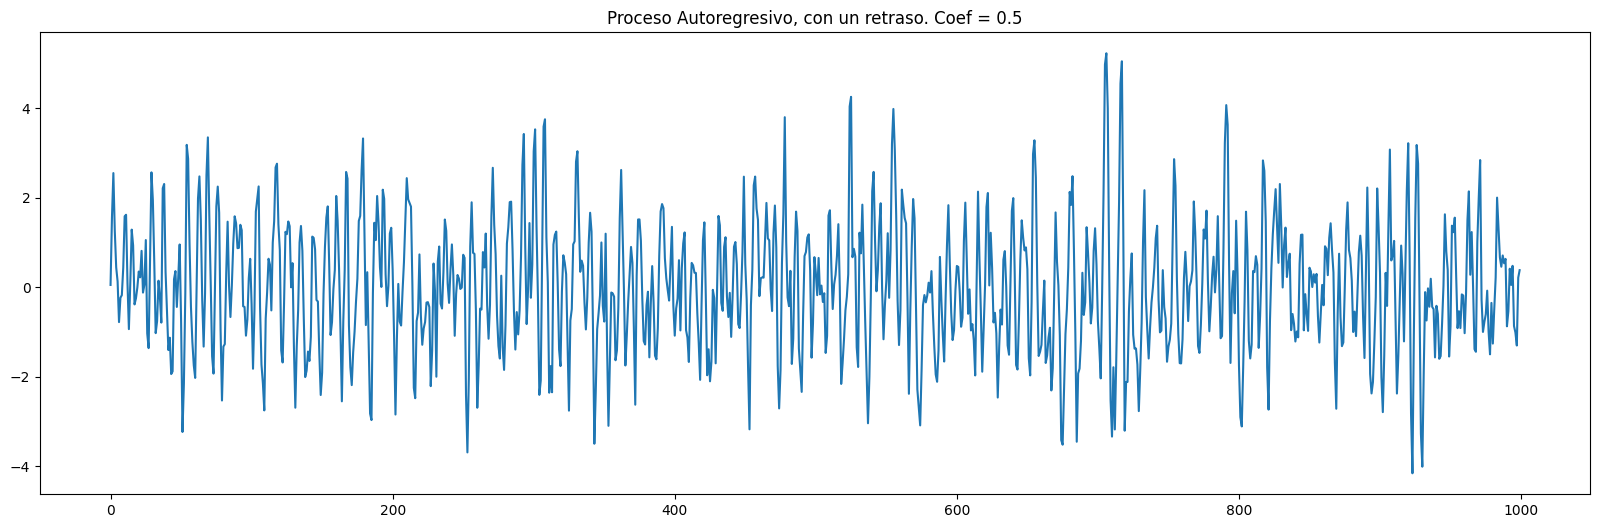

In [71]:
ar = np.array([1, - 0.9, 0.5])
ma = np.array([1])

titulo = 'Proceso Autoregresivo, con un retraso. Coef = ' + str(coef)
AR_model = ArmaProcess( ar, ma)
#plt.rc("figure", figsize=(20,4))


AR_simulacion = pd.Series(AR_model.generate_sample(nsample=1000))
AR_simulacion.plot(figsize = (20,6), title=titulo)
plt.show()

<Axes: ylabel='Frequency'>

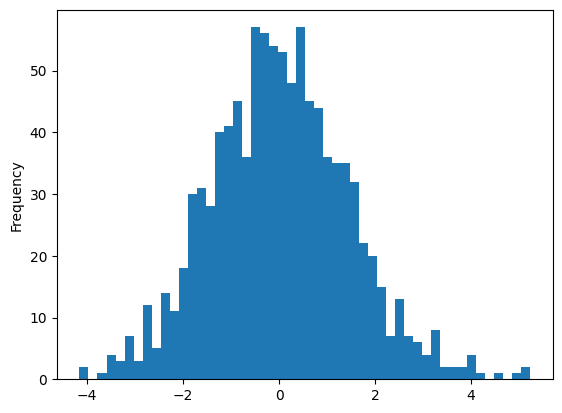

In [72]:
AR_simulacion.plot.hist(bins=50)

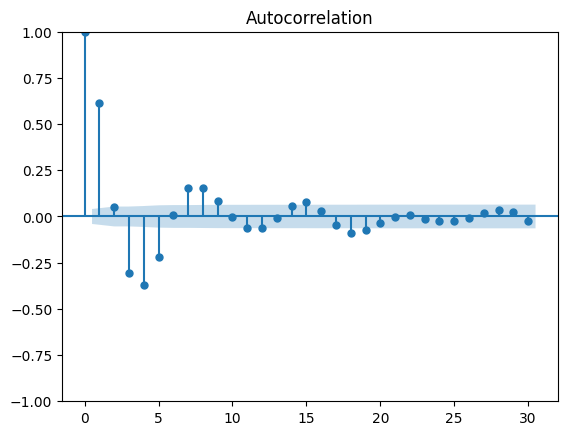

In [73]:
# Función de autocorrelación
plot_acf(AR_simulacion,   alpha=0.2, lags=30)
plt.show()

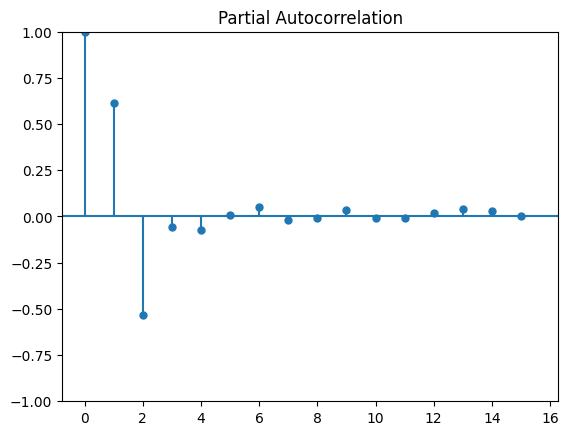

In [74]:
# Función de autocorrelación parcial

plot_pacf(AR_simulacion, alpha=1, lags=15)
plt.show()

# Simulación de serie de tiempo Medias Móviles (MA)

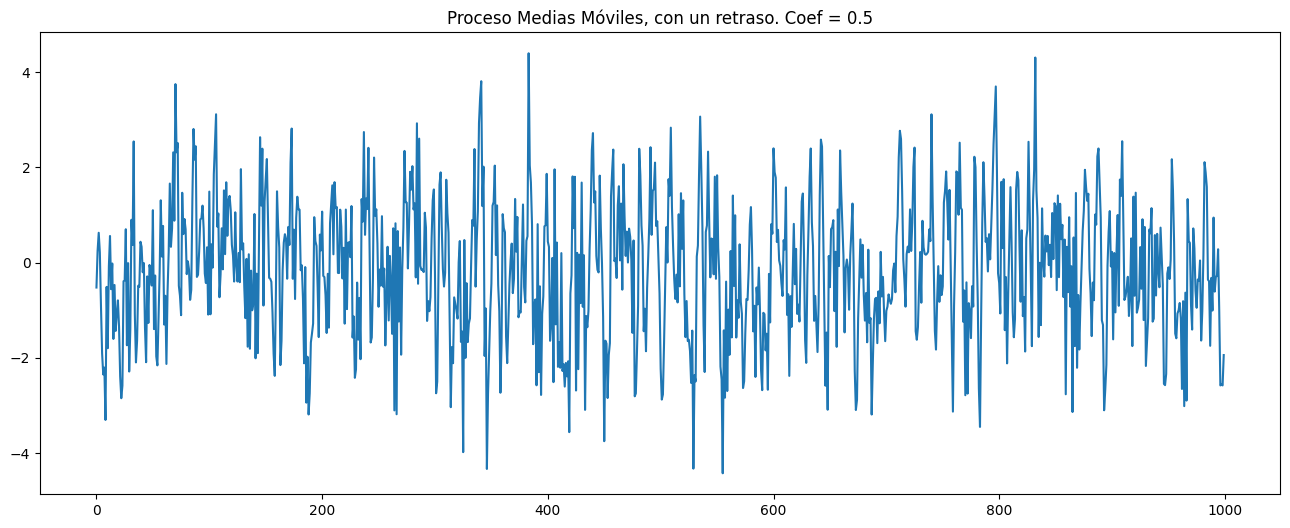

In [75]:
ar = np.array([1])
ma = np.array([1, 0.5, 0.8])

titulo = 'Proceso Medias Móviles, con un retraso. Coef = ' + str(coef)
MA_model = ArmaProcess(ar, ma)
MA_simulacion = pd.Series(MA_model.generate_sample(nsample=1000))
MA_simulacion.plot(figsize = (16,6), title=titulo)
plt.show()

<Axes: ylabel='Frequency'>

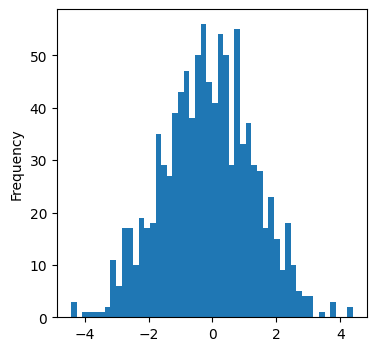

In [76]:
MA_simulacion.plot.hist(figsize=(4,4), bins=50)

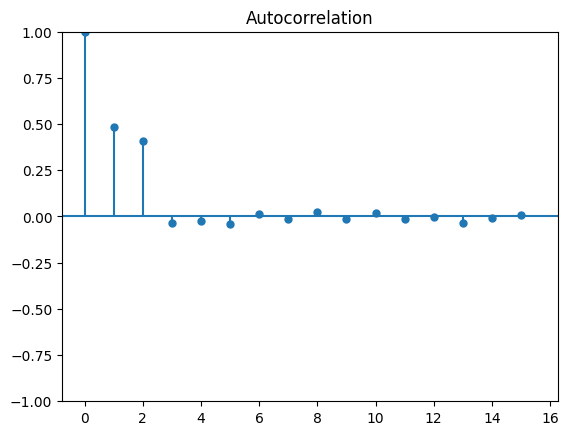

In [77]:
# Función de autocorrelación
plot_acf(MA_simulacion, alpha=1, lags=15)
plt.show()

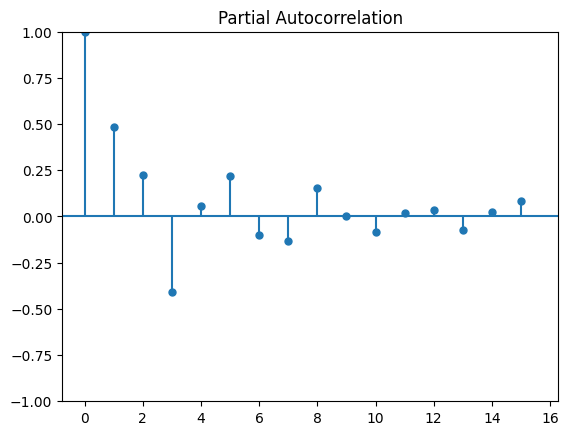

In [78]:
# Función de autocorrelación
plot_pacf(MA_simulacion, alpha=1, lags=15)
plt.show()